In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('Time_GDP.xlsx', index_col='Date', parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,Average_Imp_GDP,GDP,Monthly estimate
Date,,,
2004-04-01,1.306594e+07,NaN,4.334543e+06
2004-05-01,1.401312e+07,NaN,4.334543e+06
2004-06-01,1.193183e+07,1.193183e+07,4.225575e+06
2004-07-01,1.306594e+07,NaN,4.202242e+06
2004-08-01,1.303241e+07,NaN,4.202242e+06


In [4]:
df.drop(['Average_Imp_GDP','GDP'],axis=1,inplace=True)

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.head()

,Monthly estimate
Date,
2004-04-01,4.334543e+06
2004-05-01,4.334543e+06
2004-06-01,4.225575e+06
2004-07-01,4.202242e+06
2004-08-01,4.202242e+06


In [7]:
df_train=df[:195]
df_test=df[195:]
print(df['Monthly estimate'])

Date
2004-04-01    4.334543e+06
2004-05-01    4.334543e+06
2004-06-01    4.225575e+06
2004-07-01    4.202242e+06
2004-08-01    4.202242e+06
                  ...     
2022-01-01    1.246700e+07
2022-02-01    1.309141e+07
2022-03-01    1.300253e+07
2022-04-01    1.270708e+07
2022-05-01    1.182074e+07
Freq: MS, Name: Monthly estimate, Length: 218, dtype: float64


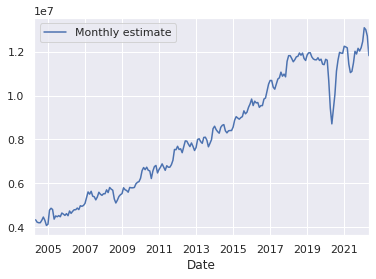

In [8]:
df.plot()

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
# Multiplicative trend / Additive seasonality model
model_mul_add = ExponentialSmoothing(df['Monthly estimate'], trend='mul', seasonal='add', seasonal_periods=12)
results_mul_add = model_mul_add.fit()
predictions_mul_add = results_mul_add.fittedvalues

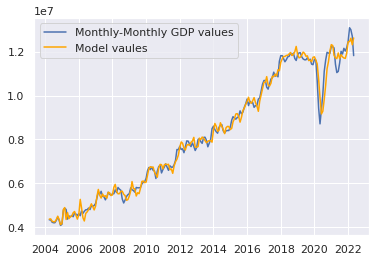

In [13]:
plt.plot(df['Monthly estimate'], label='Monthly-Monthly GDP values')
plt.plot(predictions_mul_add, color='orange', label='Model vaules')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

print(mean_absolute_percentage_error(df['Monthly estimate'],predictions_mul_add))
print(mean_squared_error(df['Monthly estimate'],predictions_mul_add))
print(mean_absolute_error(df['Monthly estimate'],predictions_mul_add))
print(np.sqrt(mean_squared_error(df['Monthly estimate'],predictions_mul_add)))

0.025316938116165706
89769314529.83015
203098.69109635547
299615.277530753


In [ ]:
df_eval=pd.read_excel('Monthly_estimate_eval.xlsx')

In [ ]:
df_eval.head()

,GDP,Quart_from_month
0,NaN,4.334543e+06
1,NaN,4.334543e+06
2,1.193183e+07,1.289466e+07
3,NaN,4.202242e+06
4,NaN,4.202242e+06


In [ ]:
df_eval.dropna(axis=0,inplace=True)

In [ ]:
df_eval.head()

,GDP,Quart_from_month
2,1.193183e+07,1.289466e+07
5,1.172184e+07,1.271570e+07
8,1.306594e+07,1.285172e+07
11,1.355801e+07,1.377377e+07
14,1.303241e+07,1.368288e+07


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
print(mean_squared_error(df_eval['GDP'],df_eval['Quart_from_month']))
print(mean_absolute_error(df_eval['GDP'],df_eval['Quart_from_month']))
print(mean_absolute_percentage_error(df_eval['GDP'],df_eval['Quart_from_month']))

1084954899835.2185
790980.5648002934
0.03341212033071676
